In [1]:
pip install pgmpy


Note: you may need to restart the kernel to use updated packages.


In [4]:
# Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor  # For GBM
import numpy as np
import tensorflow as tf  # For LSTM
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

# Load Dataset
df = pd.read_csv(r'C:\Users\prana\Downloads\supply\supply\electronics_supply_chain_data_500.csv')

# Convert Date columns to datetime
df['date'] = pd.to_datetime(df['date'])
df['order_date'] = pd.to_datetime(df['order_date'])
df['availability_date'] = pd.to_datetime(df['availability_date'])

# Handle Missing Data (if any)
imputer = SimpleImputer(strategy='mean')
df['supplier_reliability'] = imputer.fit_transform(df[['supplier_reliability']])

# Encoding Categorical Columns
label_encoder = LabelEncoder()
df['product_category'] = label_encoder.fit_transform(df['product_category'])
df['supplier_name'] = label_encoder.fit_transform(df['supplier_name'])
df['supplier_location'] = label_encoder.fit_transform(df['supplier_location'])

# Feature Selection
X = df[['product_id', 'product_category', 'supplier_id', 'supplier_reliability', 'quantity_ordered']]
y = df['quantity_available']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling Features for GBM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:

# GBM Model
gbm_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gbm_model.fit(X_train_scaled, y_train)

# Prediction
gbm_predictions = gbm_model.predict(X_test_scaled)

# Calculate MSE
gbm_mse = mean_squared_error(y_test, gbm_predictions)

print(f'GBM Mean Squared Error: {gbm_mse}')

NameError: name 'mean_squared_error' is not defined

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')


Random Forest MSE: 170760.7483557692


In [24]:
from sklearn.metrics import mean_squared_error

# Reshape for LSTM
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM Model
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(tf.keras.layers.Dense(1))

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=50, verbose=0)

# Prediction
lstm_predictions = lstm_model.predict(X_test_lstm)

# Calculate MSE
mse = mean_squared_error(y_test, lstm_predictions)

print(f'Mean Squared Error: {mse}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Mean Squared Error: 233475.4776010486


In [3]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate model performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Decision Tree MSE: {mse_dt}')


Decision Tree MSE: 403323.25


In [4]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate model performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}')


Linear Regression MSE: 142586.76020265295


In [28]:

# Print Results
print(f'Model Evaluation:')
print(f'Random Forest MSE: {mse_rf}')
print(f'Decision Tree MSE: {mse_dt}')
print(f'Linear Regression MSE: {mse_lr}')
print(f'GBM MSE: {mse_gbm}')
print(f'LSTM MSE: {mse_lstm}')

# Compare results
mse_results = {
    'Random Forest': mse_rf,
    'Decision Tree': mse_dt,
    'Linear Regression': mse_lr,
    'GBM': mse_gbm,
    'LSTM': mse_lstm
}

# Get the best model based on lowest MSE
best_model = min(mse_results, key=mse_results.get)
print(f'Best model based on MSE: {best_model} with MSE: {mse_results[best_model]}')


c:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000025C91263EC0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Model Evaluation:
Random Forest MSE: 164992.39549807692
Decision Tree MSE: 399448.57692307694
Linear Regression MSE: 142586.7602026525
GBM MSE: 237884.12138086915
LSTM MSE: 516368.7954712872
Best model based on MSE: Linear Regression with MSE: 142586.7602026525


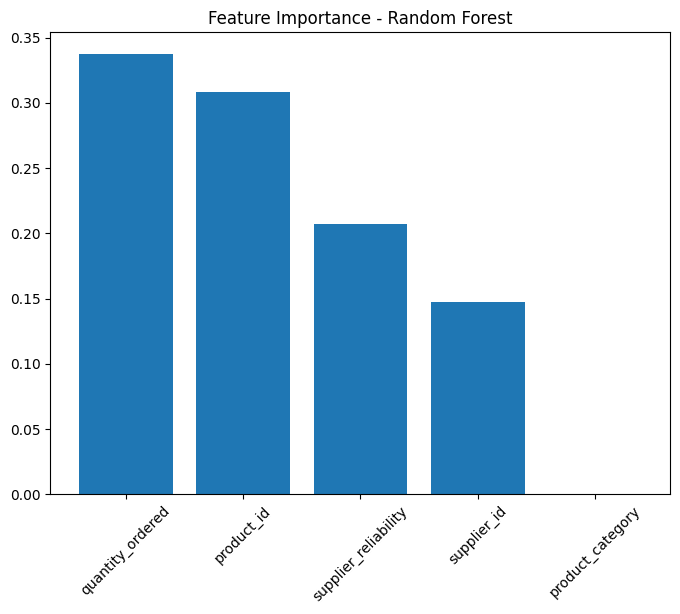

In [6]:
# Feature importance from Random Forest
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importance
importances = rf_model.feature_importances_
feature_names = ['product_id', 'product_category', 'supplier_id', 'supplier_reliability', 'quantity_ordered']

# Plot feature importance
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.show()


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Define parameter grid for Linear Regression (though it has fewer hyperparameters)
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]  # Note: normalize is deprecated in newer versions
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearch to the data
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print(f"Best parameters from GridSearch: {grid_search.best_params_}")

# Use the best estimator to predict
best_lr_model = grid_search.best_estimator_
y_pred_best_lr = best_lr_model.predict(X_test)
mse_best_lr = mean_squared_error(y_test, y_pred_best_lr)
print(f'Best Linear Regression MSE after tuning: {mse_best_lr}')


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters from GridSearch: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best Random Forest MSE after tuning: 158598.39161617498


In [8]:
import joblib

# Save the best model (Random Forest example)
joblib.dump(best_rf_model, 'best_rf_model.pkl')
print("Best Random Forest model saved.")


Best Random Forest model saved.


In [9]:
# Load the saved model
loaded_model = joblib.load('best_rf_model.pkl')

# Predict using the loaded model
y_pred_loaded = loaded_model.predict(X_test)
mse_loaded = mean_squared_error(y_test, y_pred_loaded)
print(f'MSE of loaded model: {mse_loaded}')


MSE of loaded model: 158598.39161617498


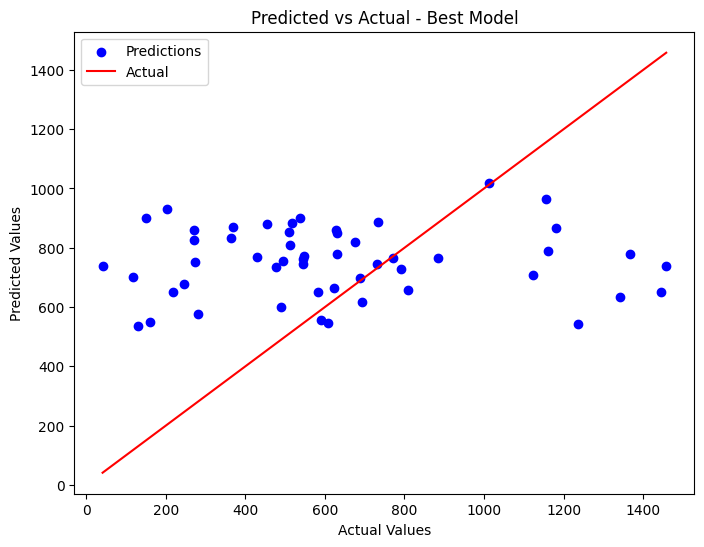

In [10]:
# Plotting predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best_rf, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual - Best Model')
plt.legend()
plt.show()


In [2]:
import pickle
from sklearn.ensemble import RandomForestRegressor

# Assuming you have a trained model named 'model'
model = RandomForestRegressor()  # Replace with your actual model
# After training your model, save it like this
with open('A:/supply/best_rf_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [3]:
import pickle

try:
    with open('A:/supply/best_rf_model.pkl', 'rb') as file:
        model = pickle.load(file)
except Exception as e:
    print(f"Error loading model: {e}")


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import pickle

# Load your dataset
df = pd.read_csv('A:/supply/electronics_supply_chain_data_500.csv')

# Prepare your features and target variable
# Make sure to adjust these columns according to your dataset
X = df[['product_category', 'supplier_reliability', 'demand_forecast', 'quantity_ordered', 'order_date']]

# Convert 'order_date' to datetime and then to a numerical format
df['order_date'] = pd.to_datetime(df['order_date'])
X['order_date'] = (df['order_date'] - df['order_date'].min()).dt.days  # Number of days since the first order date

# Convert the target variable 'availability_date' to datetime and then to a numeric format
df['availability_date'] = pd.to_datetime(df['availability_date'])
y = (df['availability_date'] - df['availability_date'].min()).dt.days  # Number of days since the first availability date

# Handle categorical features
X = pd.get_dummies(X)

# Initialize and fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Save the model
with open('A:/supply/best_rf_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model trained and saved successfully.")


C:\Users\nikhi\AppData\Local\Temp\ipykernel_9616\751770572.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['order_date'] = (df['order_date'] - df['order_date'].min()).dt.days  # Number of days since the first order date


Model trained and saved successfully.
